In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/stacked_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 106s 8ms/step


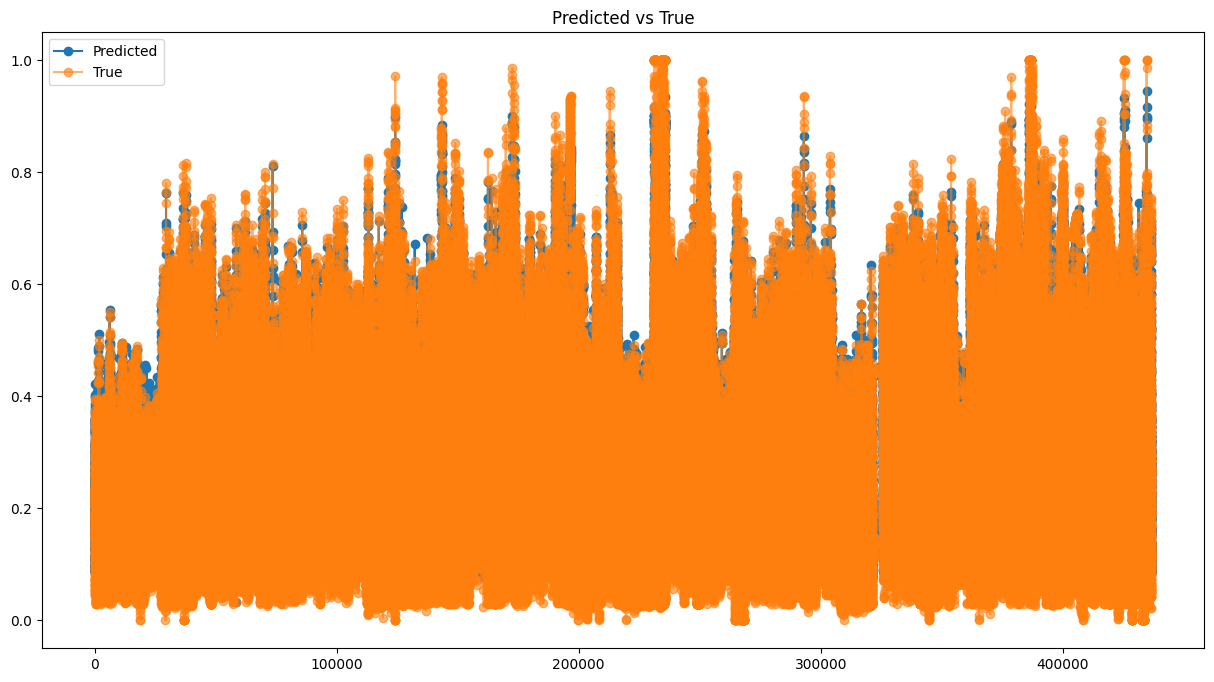

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.030643035605962977,
 'mse': 0.04102582187194058,
 'rmse': 0.0016831180602681981}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          155.158539
1          149.124298
2          145.484528
3          146.137512
4          145.603134
...               ...
436585      91.920135
436586     141.987289
436587     172.393463
436588     214.510880
436589     212.112122

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  155.158539
2023-01-01 00:15:00   140.0  149.124298
2023-01-01 00:30:00   139.0  145.484528
2023-01-01 00:45:00   145.0  146.137512
2023-01-01 01:00:00   159.0  145.603134
...                     ...         ...
2035-06-14 18:15:00   137.0   91.920135
2035-06-14 18:30:00   177.0  141.987289
2035-06-14 18:45:00   198.0  172.393463
2035-06-14 19:00:00   216.0  214.510880
2035-06-14 19:15:00   233.0  212.112122

[436590 rows x 2 columns]

AP, BE, EP: (0.8875624443126143, 0.058711969380813536, 0.053725586306572086)


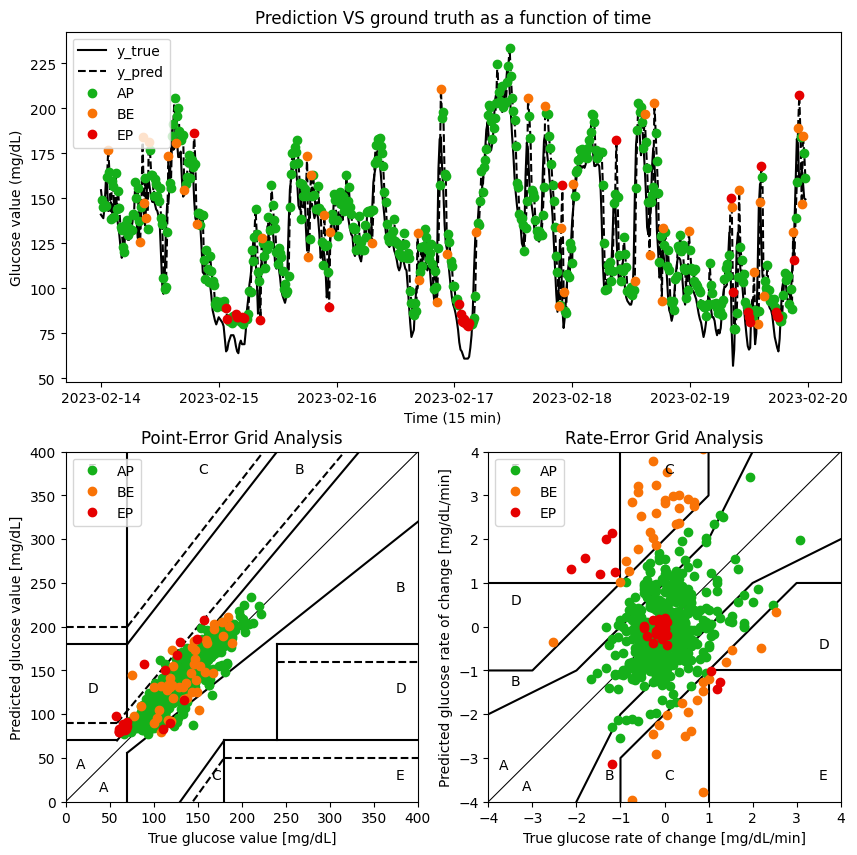

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  155.158539       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  149.124298 -0.066667 -0.402283     AP   
2      2023-02-14 00:30:00   139.0  145.484528 -0.066667 -0.242651     AP   
3      2023-02-14 00:45:00   145.0  146.137512  0.400000  0.043532     AP   
4      2023-02-14 01:00:00   159.0  145.603134  0.933333 -0.035625     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   91.920135  2.333333 -0.021879     BE   
436586 2035-07-28 18:30:00   177.0  141.987289  2.666667  3.337810     AP   
436587 2035-07-28 18:45:00   198.0  172.393463  1.400000  2.027078     AP   
436588 2035-07-28 19:00:00   216.0  214.510880  1.200000  2.807828     AP   
436589 2035-07-28 19:15:00   233.0  212.112122  1.133333 -0.159917     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436585     A    lD  
436586     A     A  
436587     A     A  
436588     A     B  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 60 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 30ms/step


Glucose level Predict  Glucose level True
0               0.250345            0.219565
1               0.237227            0.217391

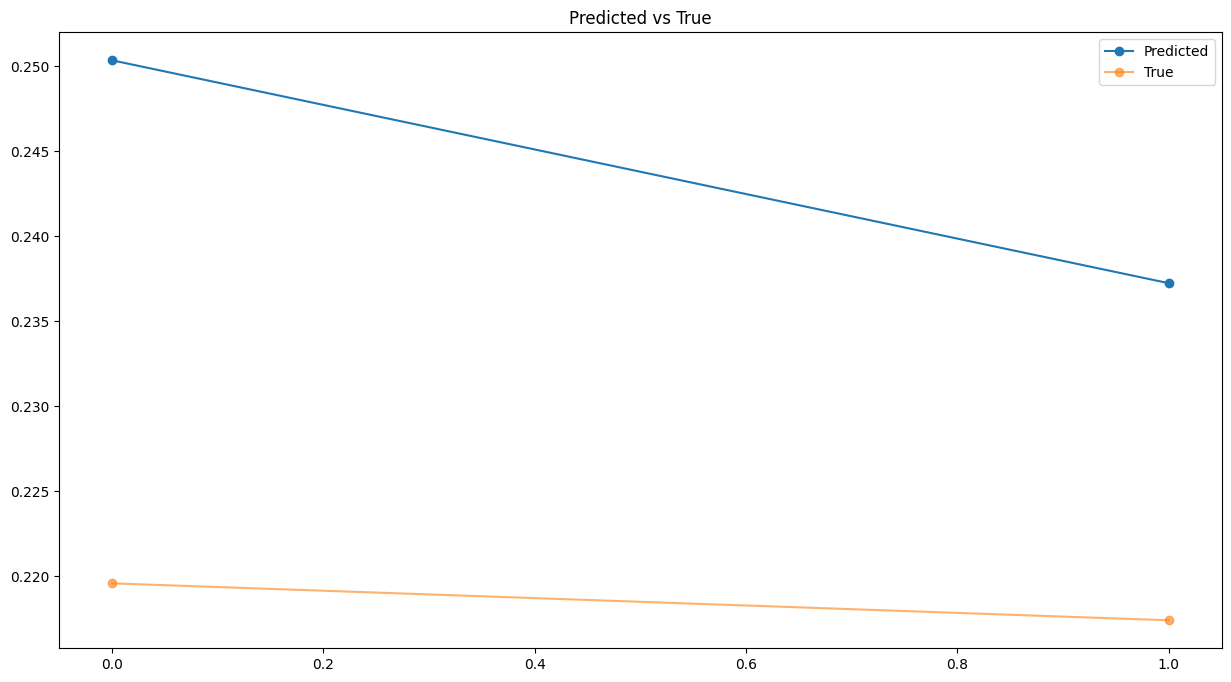

{'mae': 0.025307425921377913,
 'mse': 0.025892247671107756,
 'rmse': 0.000670408489461985}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             155.158539               141.0
1             149.124298               140.0

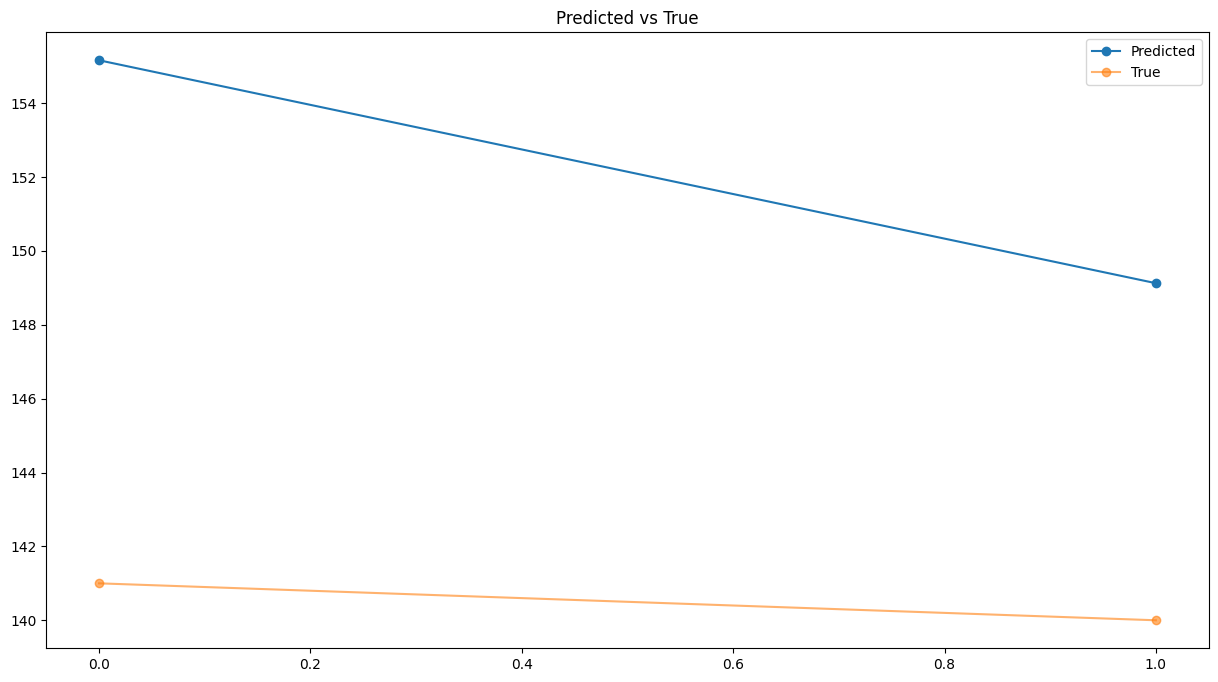

{'mae': 11.64141845703125,
 'mse': 11.910437380932763,
 'rmse': 141.85851860512048}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 60 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 27ms/step


Glucose level Predict  Glucose level True
0               0.250345            0.219565
1               0.291637            0.217391

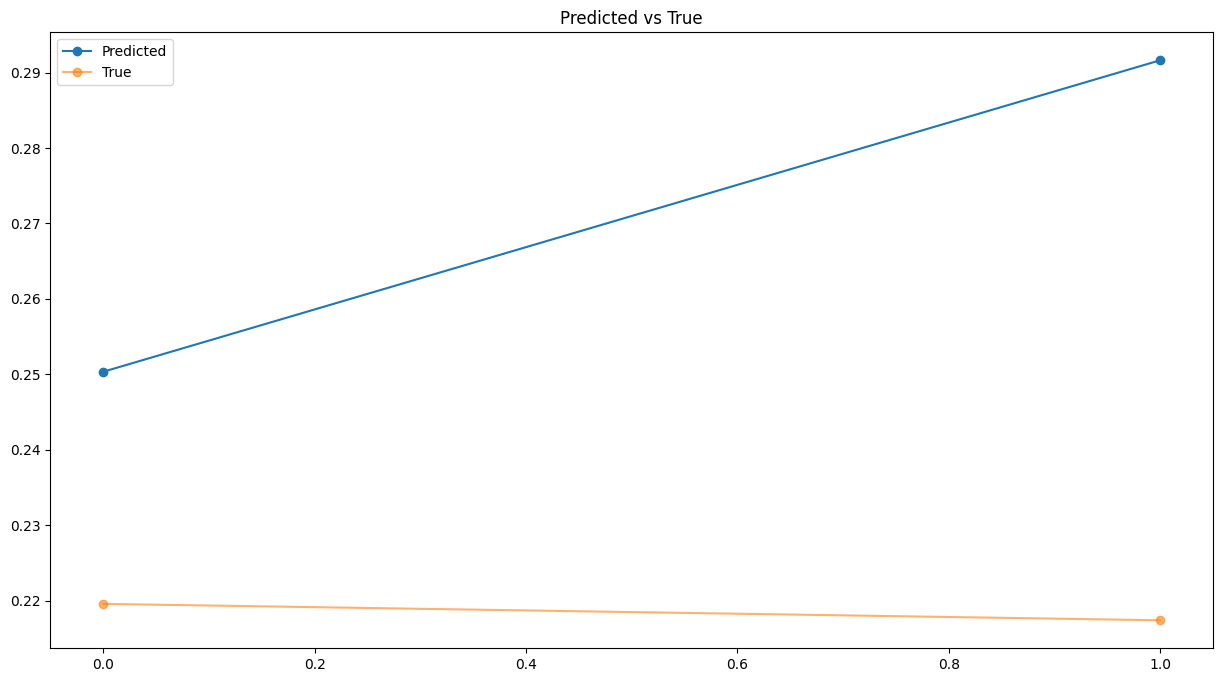

{'mae': 0.05251239395659901,
 'mse': 0.05683197885890896,
 'rmse': 0.0032298738210194754}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             155.158539               141.0
1             174.152878               140.0

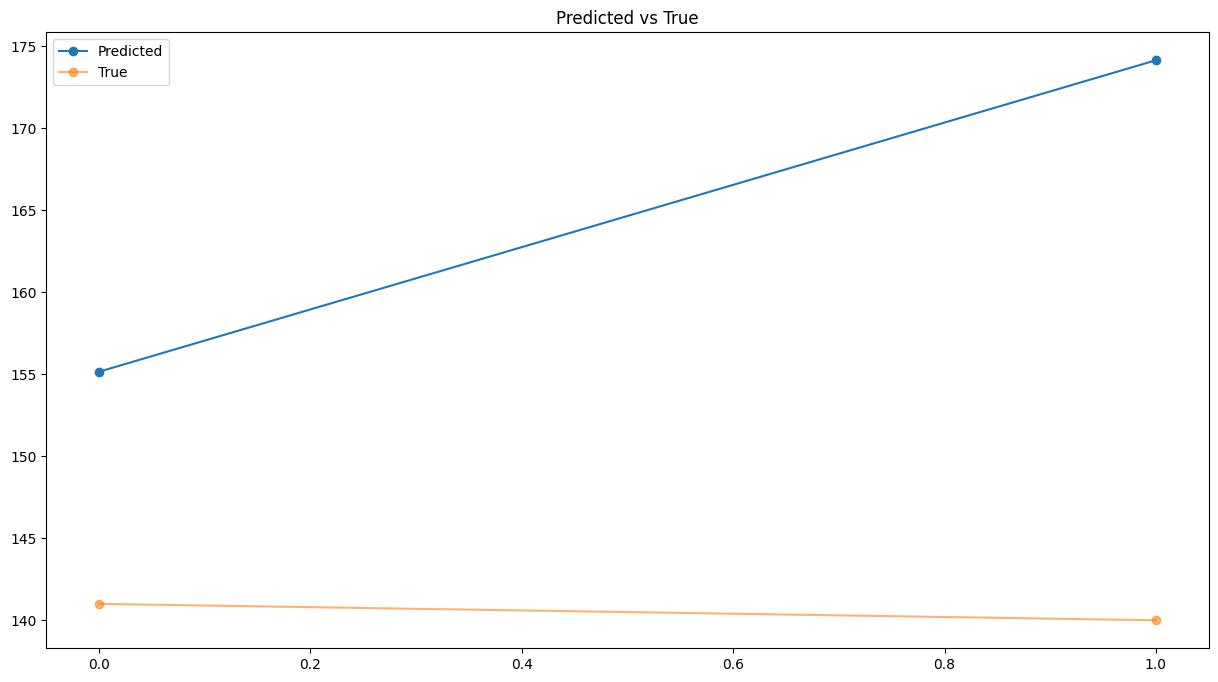

{'mae': 24.15570831298828, 'mse': 26.14271680614909, 'rmse': 683.4416420065099}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 8ms/step


Glucose level Predict  Glucose level True
0               0.274478            0.182609
1               0.247465            0.154348
2               0.143434            0.152174
3               0.177367            0.150000
4               0.159487            0.123913

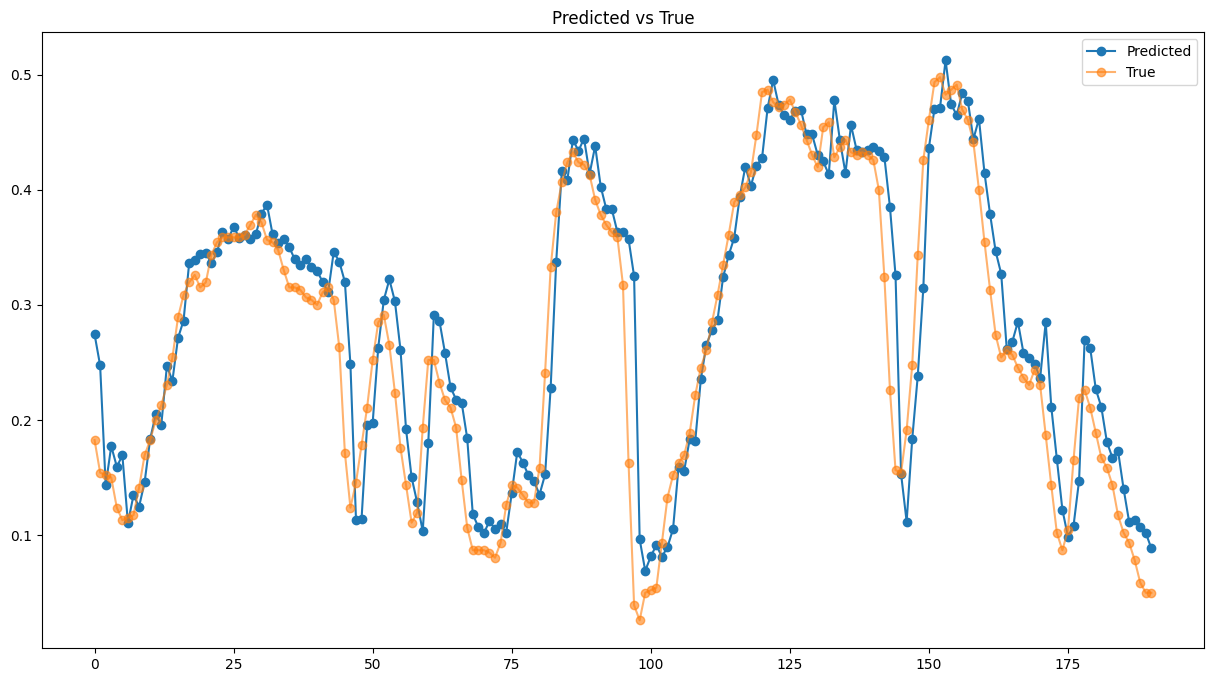

{'mae': 0.03516153319160677,
 'mse': 0.05124323191523212,
 'rmse': 0.0026258688171182636}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

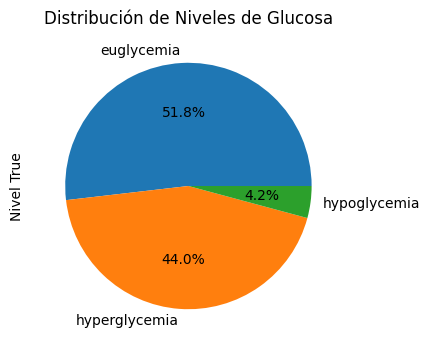

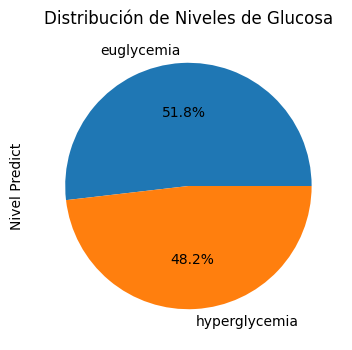

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             166.259903    euglycemia
1               111.0  euglycemia             153.834106    euglycemia
2               110.0  euglycemia             105.979828    euglycemia
3               109.0  euglycemia             121.588867    euglycemia
4                97.0  euglycemia             113.364143    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


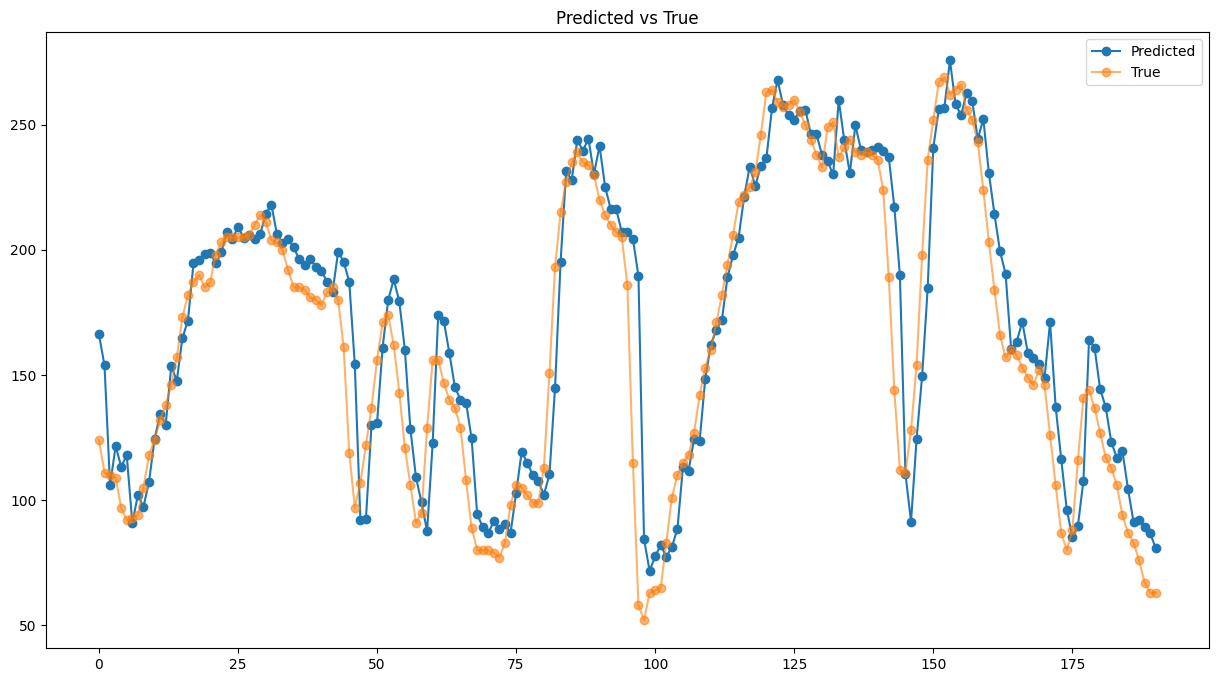

{'mae': 16.174304822352543, 'mse': 23.5718874157495, 'rmse': 555.6338763407697}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  166.259903
2023-01-01 00:15:00   111.0  153.834106
2023-01-01 00:30:00   110.0  105.979828
2023-01-01 00:45:00   109.0  121.588867
2023-01-01 01:00:00    97.0  113.364143
...                     ...         ...
2023-01-02 22:30:00    83.0   91.367569
2023-01-02 22:45:00    76.0   92.205185
2023-01-02 23:00:00    67.0   89.305420
2023-01-02 23:15:00    63.0   86.857979
2023-01-02 23:30:00    63.0   80.705551

[191 rows x 2 columns]

AP, BE, EP: (0.8947368421052632, 0.05789473684210526, 0.04736842105263158)


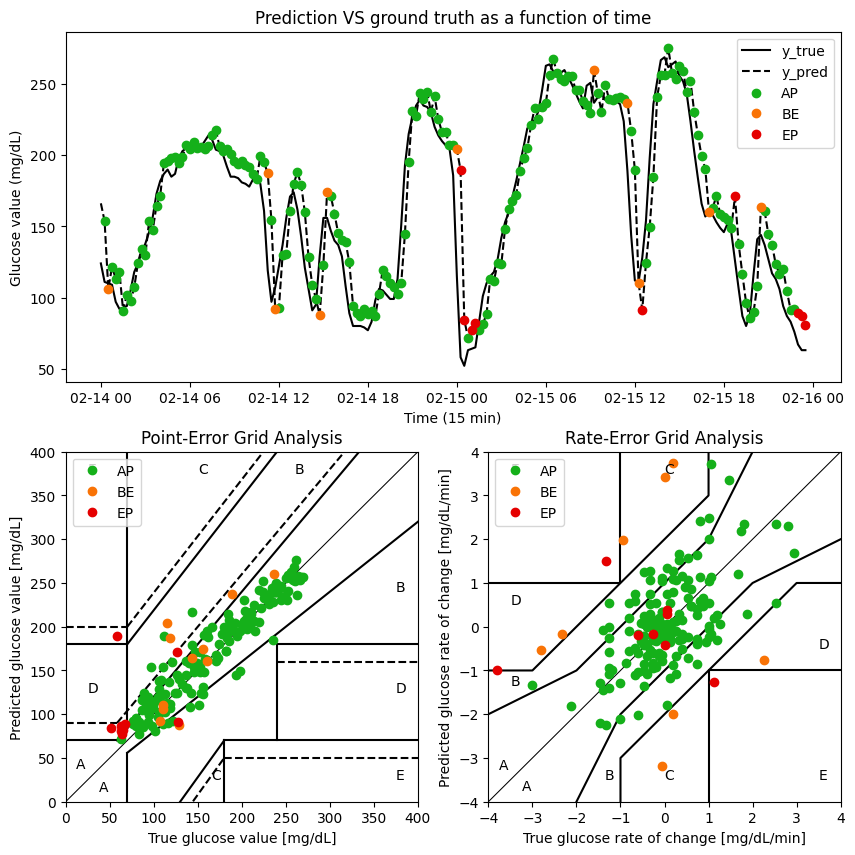

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 1s 10ms/step


Glucose level Predict  Glucose level True
0               0.343962            0.373913
1               0.388581            0.400000
2               0.404540            0.404348
3               0.432536            0.406522
4               0.405522            0.397826

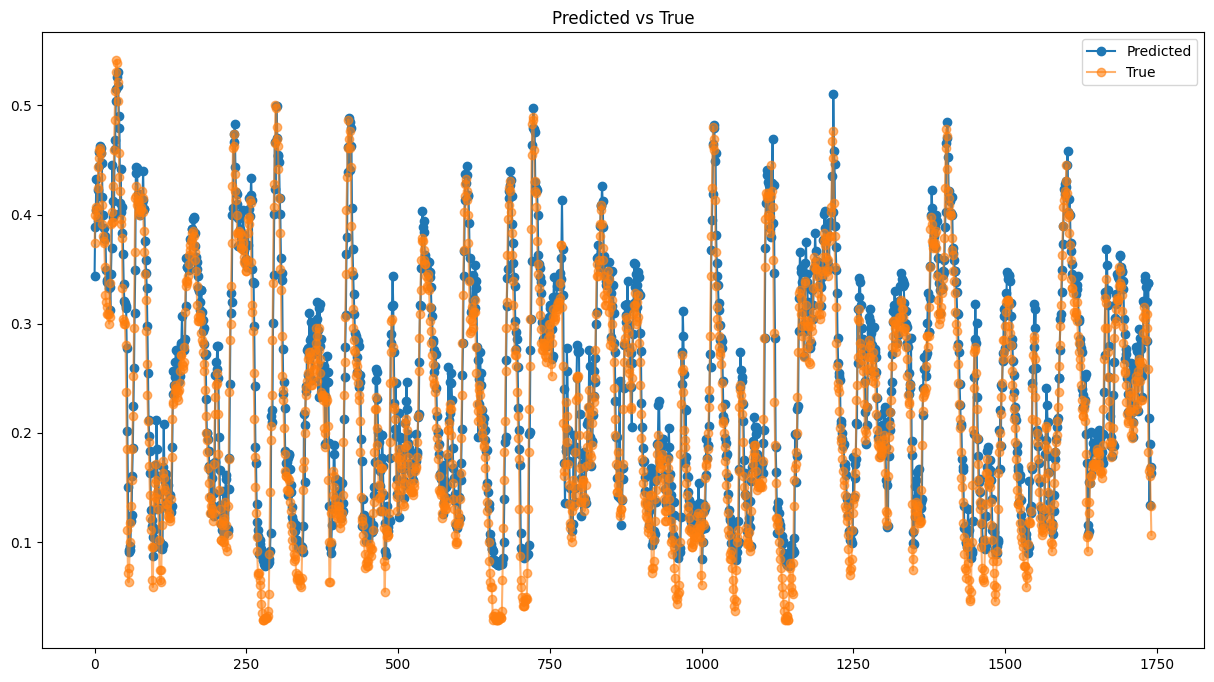

{'mae': 0.027360879049327685,
 'mse': 0.03341945702239346,
 'rmse': 0.0011168601076716037}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

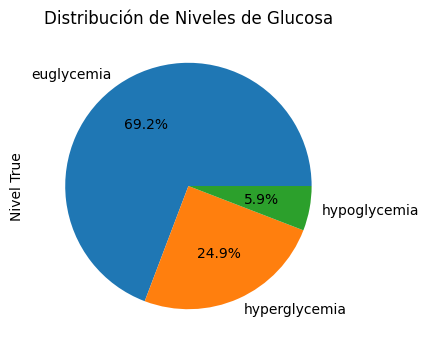

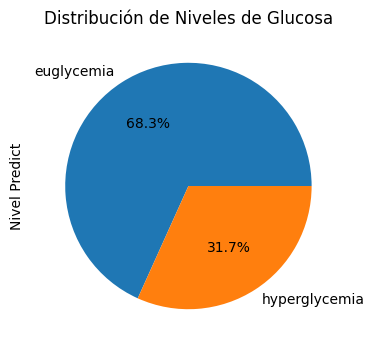

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             198.222397  hyperglycemia
1               224.0  hyperglycemia             218.747192  hyperglycemia
2               226.0  hyperglycemia             226.088593  hyperglycemia
3               227.0  hyperglycemia             238.966354  hyperglycemia
4               223.0  hyperglycemia             226.540207  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


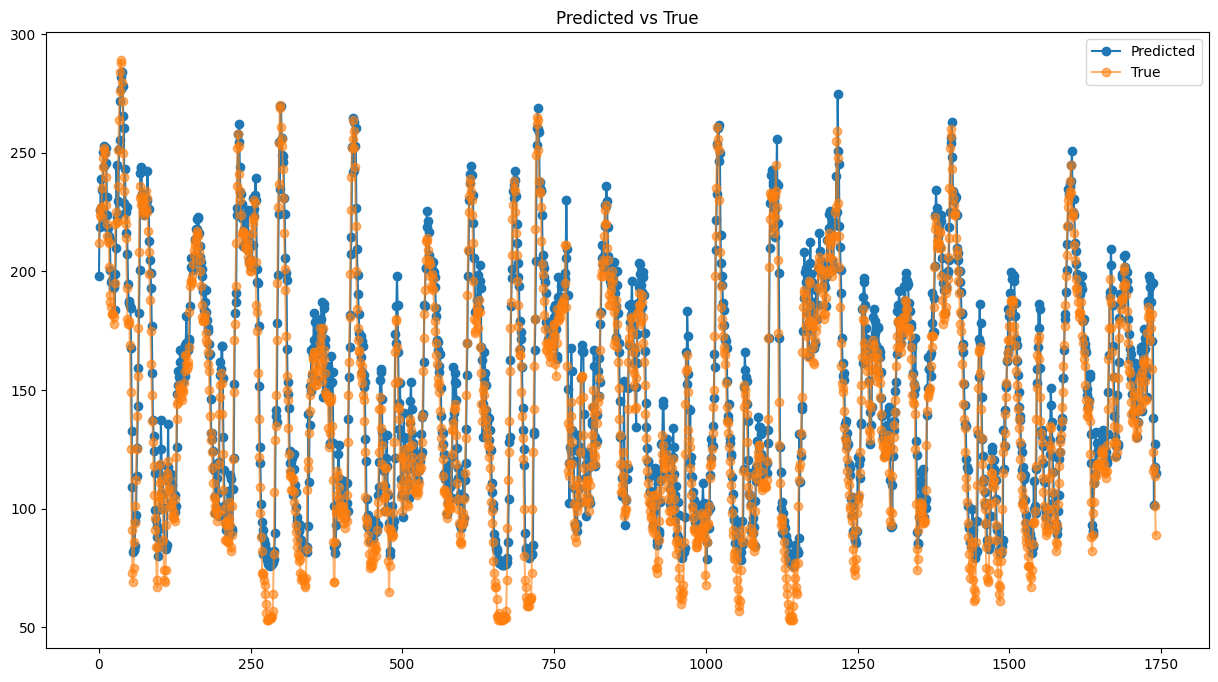

{'mae': 12.586004999557128,
 'mse': 15.372950943219784,
 'rmse': 236.32762070264204}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  198.222397
2023-01-01 00:15:00   224.0  218.747192
2023-01-01 00:30:00   226.0  226.088593
2023-01-01 00:45:00   227.0  238.966354
2023-01-01 01:00:00   223.0  226.540207
...                     ...         ...
2023-01-19 02:15:00   116.0  138.081345
2023-01-19 02:30:00   117.0  101.699837
2023-01-19 02:45:00   114.0  127.259483
2023-01-19 03:00:00   101.0  117.479698
2023-01-19 03:15:00    89.0  115.032532

[1742 rows x 2 columns]

AP, BE, EP: (0.9144170017231477, 0.024124066628374498, 0.061458931648477884)


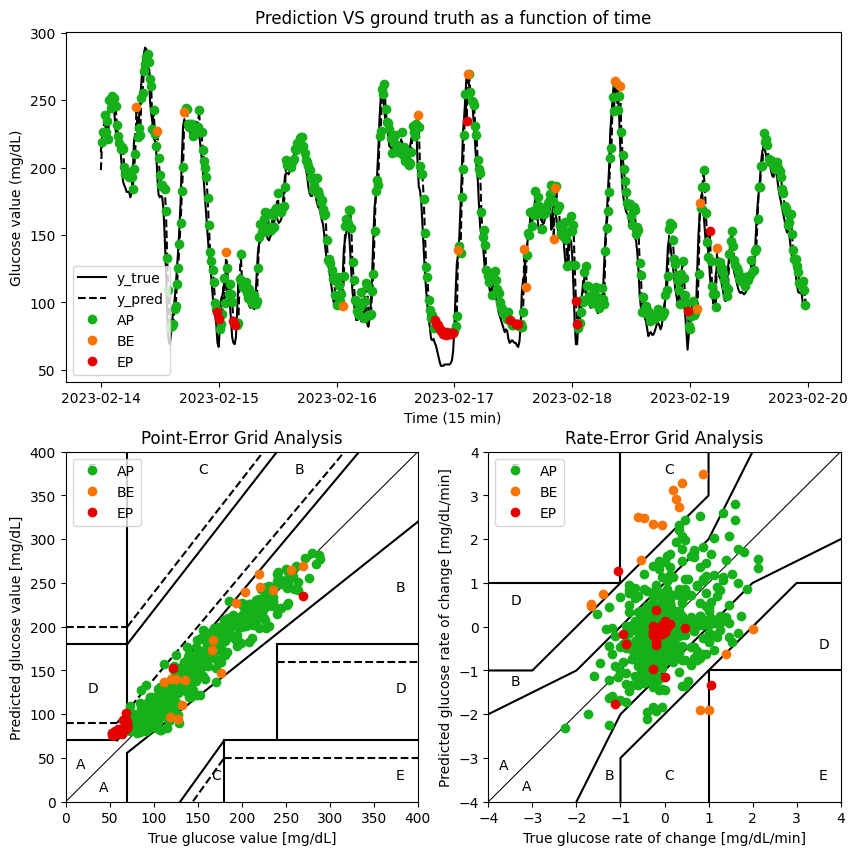

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 8ms/step


Glucose level Predict  Glucose level True
0               0.337502            0.261858
1               0.293873            0.229051
2               0.251319            0.196245
3               0.199644            0.163439
4               0.173214            0.130632

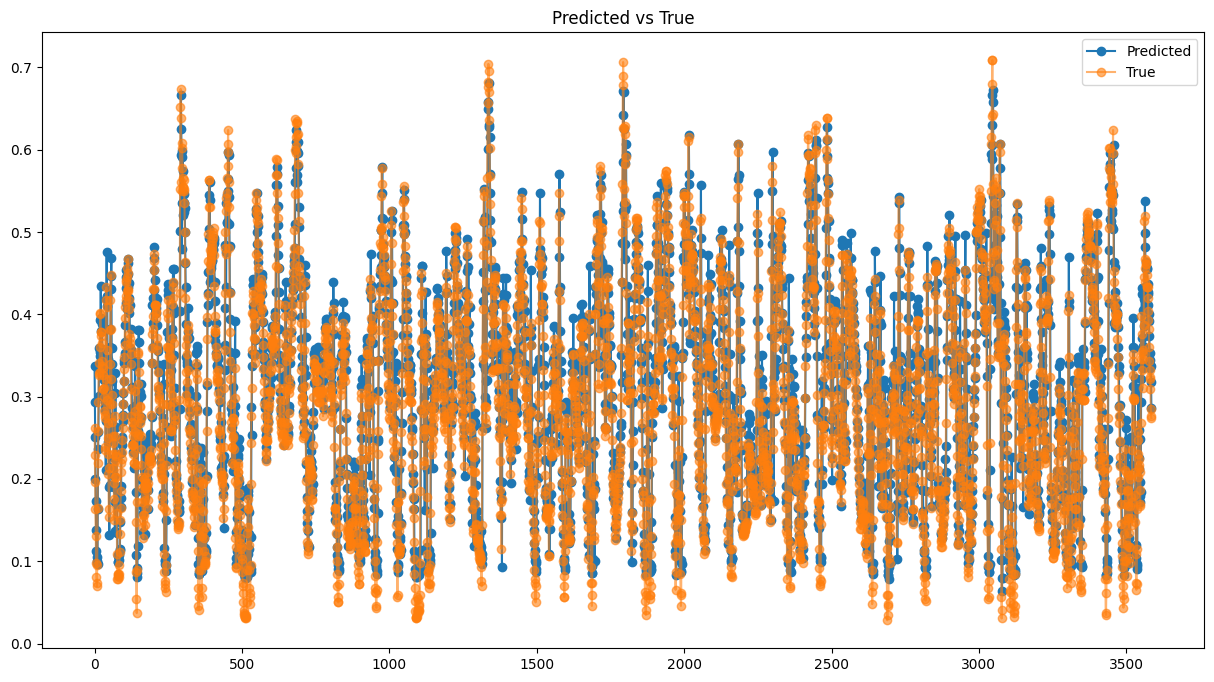

{'mae': 0.03757154584419683,
 'mse': 0.04930897262771728,
 'rmse': 0.002431374781600972}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

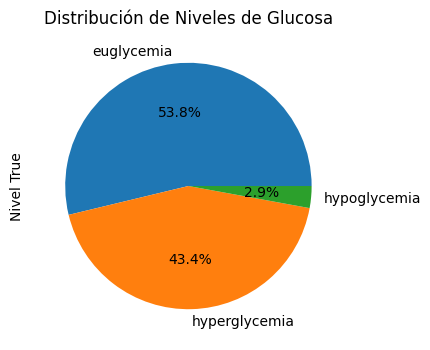

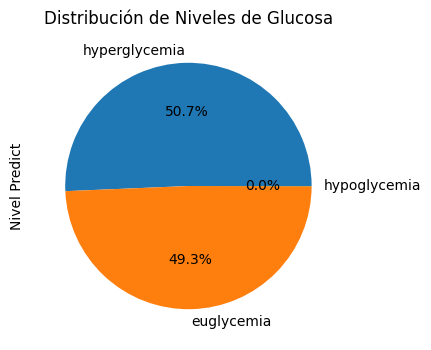

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             195.250732  hyperglycemia
1          145.363636  euglycemia             175.181473     euglycemia
2          130.272727  euglycemia             155.606903     euglycemia
3          115.181818  euglycemia             131.836075     euglycemia
4          100.090909  euglycemia             119.678673     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


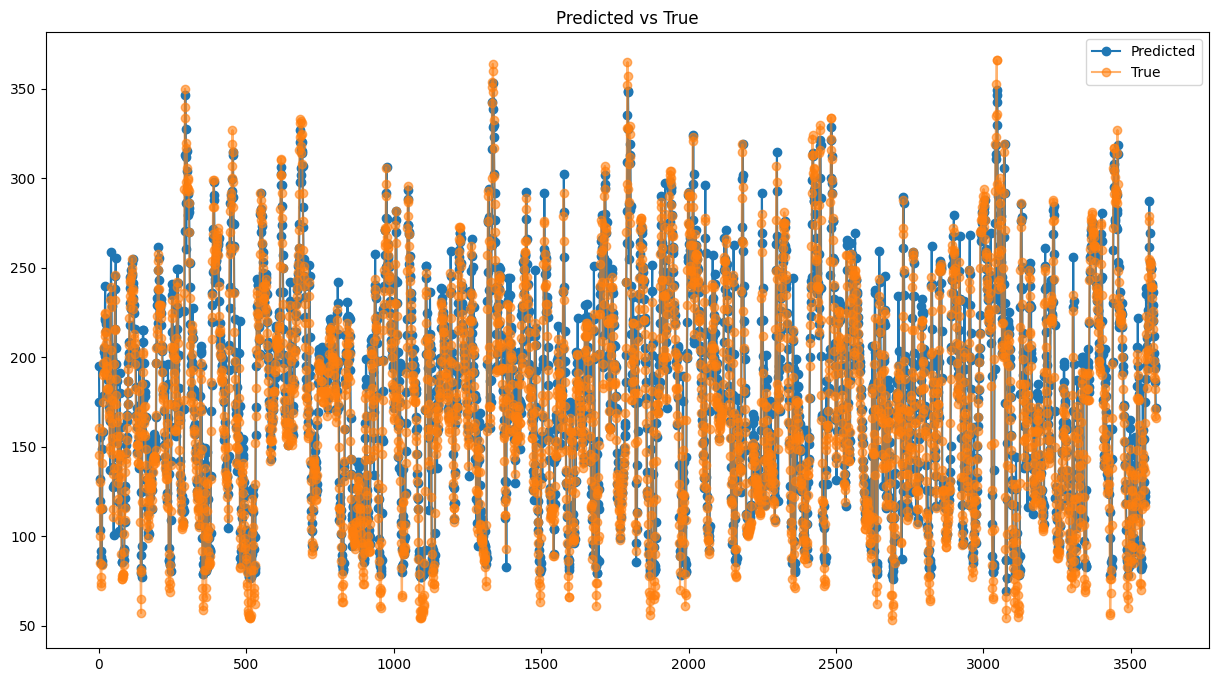

{'mae': 17.282911834651834,
 'mse': 22.68212789166487,
 'rmse': 514.4789256938413}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  195.250732
2023-01-01 00:15:00  145.363636  175.181473
2023-01-01 00:30:00  130.272727  155.606903
2023-01-01 00:45:00  115.181818  131.836075
2023-01-01 01:00:00  100.090909  119.678673
...                         ...         ...
2023-02-07 07:15:00  188.000000  195.640015
2023-02-07 07:30:00  182.000000  194.133423
2023-02-07 07:45:00  171.000000  195.170151
2023-02-07 08:00:00  167.000000  185.963531
2023-02-07 08:15:00  166.000000  171.427170

[3586 rows x 2 columns]

AP, BE, EP: (0.8613668061366806, 0.08479776847977685, 0.05383542538354254)


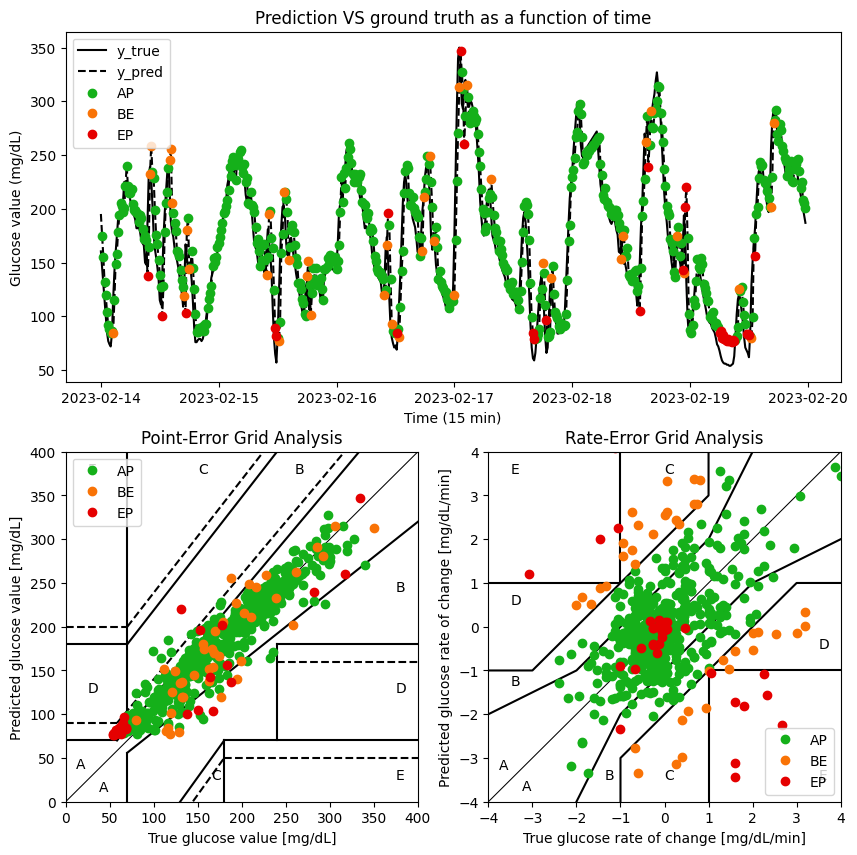

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 8ms/step


Glucose level Predict  Glucose level True
0               0.525341            0.534783
1               0.527683            0.500000
2               0.512824            0.484783
3               0.456432            0.463043
4               0.478560            0.428261

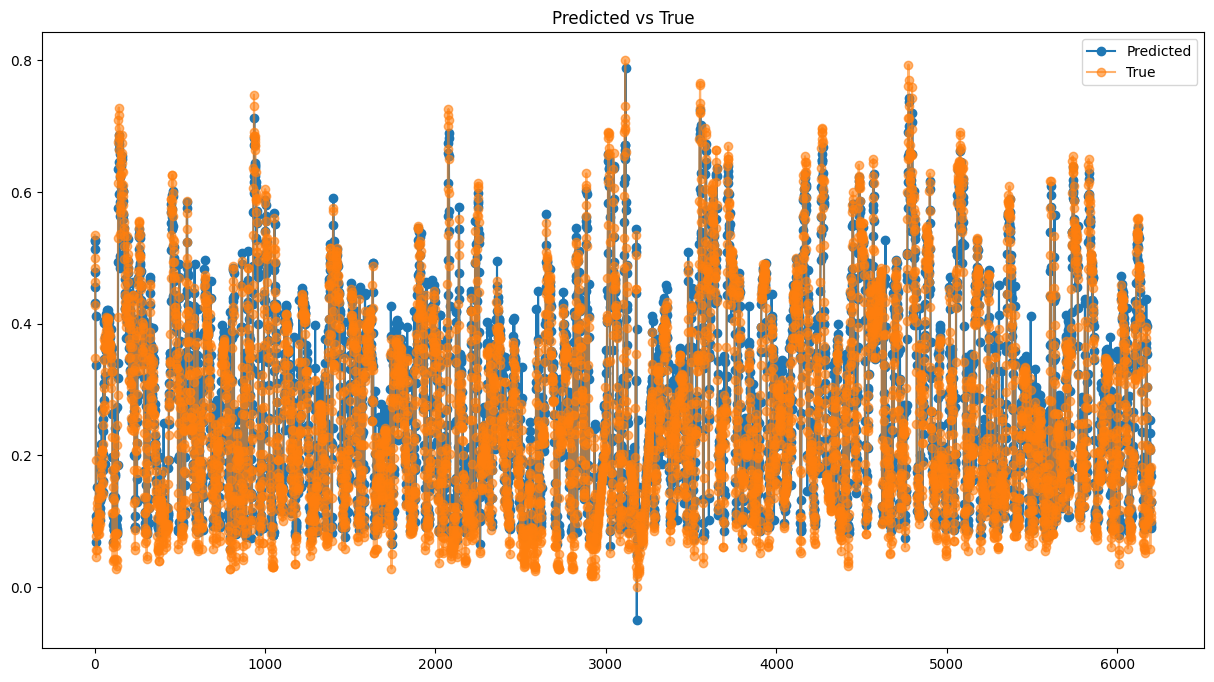

{'mae': 0.03999497671263264,
 'mse': 0.05509788291893375,
 'rmse': 0.0030357767021485316}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

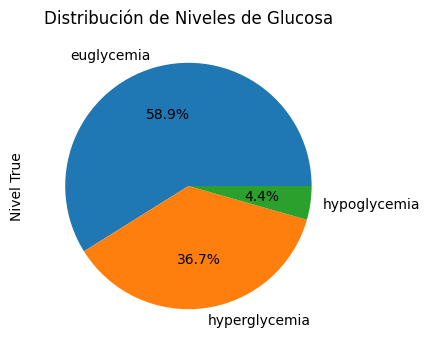

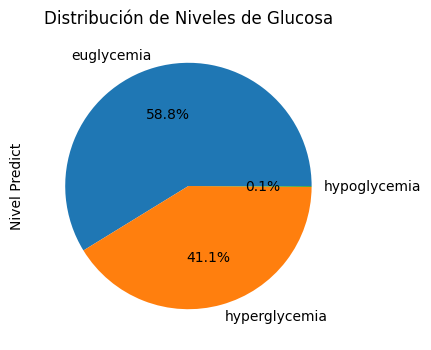

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             281.656891  hyperglycemia
1               270.0  hyperglycemia             282.734100  hyperglycemia
2               263.0  hyperglycemia             275.898865  hyperglycemia
3               253.0  hyperglycemia             249.958511  hyperglycemia
4               237.0  hyperglycemia             260.137512  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


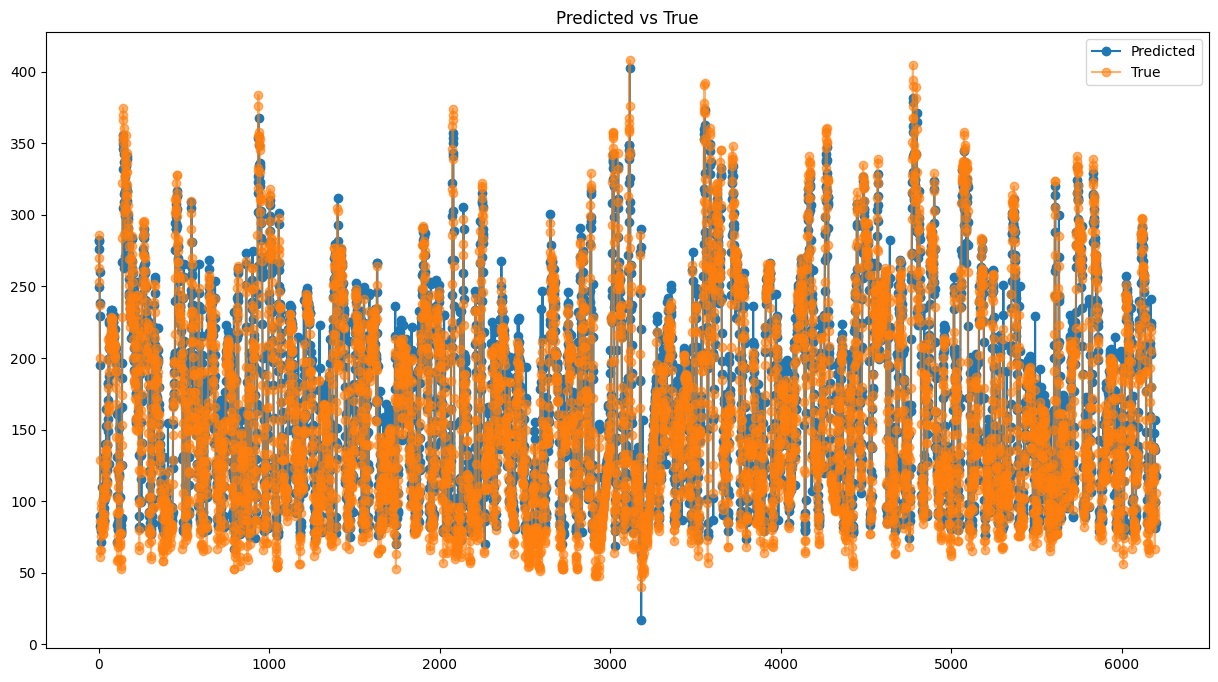

{'mae': 18.397689953127077,
 'mse': 25.34502679473548,
 'rmse': 642.3703832258595}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  281.656891
2023-01-01 00:15:00   270.0  282.734100
2023-01-01 00:30:00   263.0  275.898865
2023-01-01 00:45:00   253.0  249.958511
2023-01-01 01:00:00   237.0  260.137512
...                     ...         ...
2023-03-06 13:00:00   100.0   82.504250
2023-03-06 13:15:00    89.0   99.723244
2023-03-06 13:30:00    92.0   99.669701
2023-03-06 13:45:00   106.0   84.526924
2023-03-06 14:00:00   124.0  117.553673

[6201 rows x 2 columns]

AP, BE, EP: (0.8196774193548387, 0.10870967741935483, 0.07161290322580645)


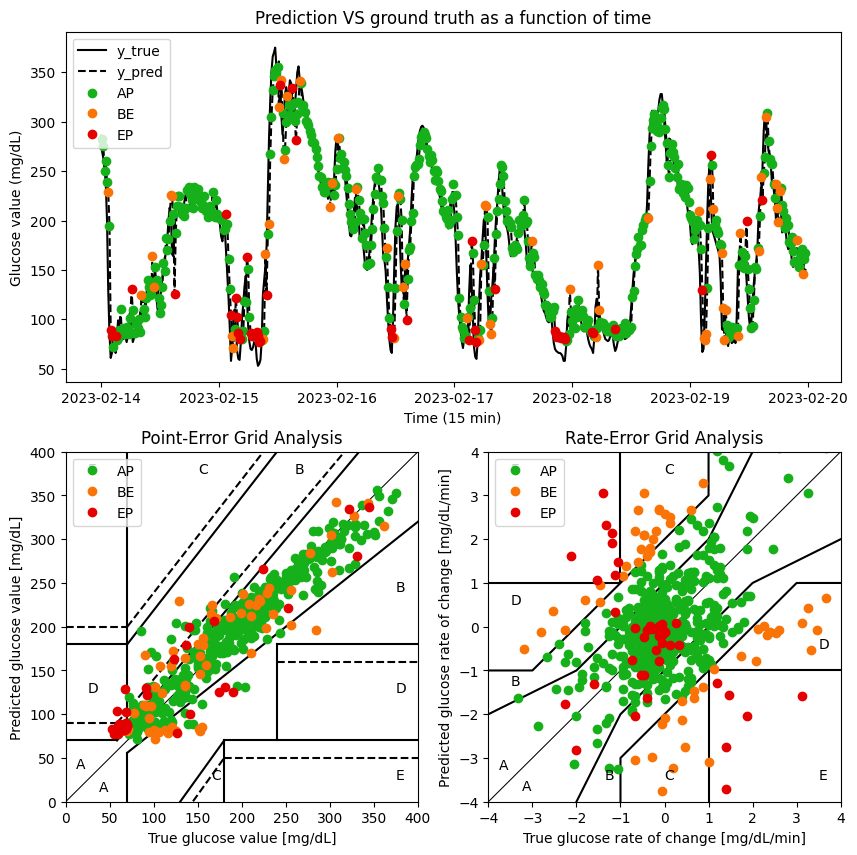

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)